# IST256 Project Deliverable 3 (P3)

## Phase 3: Data Story / Coding for Explanation

In this step, you submit the final version of your working code. You should be implementing the data story that you discussed in P2 (2.3.1). 

All code necessary to make the project run should be included in this notebook. This include all imports, functions, setup code and your interact. There should be no code that causes errors or exploratory code here.

The expectation is that your instructor can open this notebook, run all cells, and then use your program.

The code you write should be clear, easy to understand and use the affordances learned in the course.

No changes to your code will be considered after this submission. It is important to take prior instructor feedback taken into consideration and these factor into your evaluation.


### Step 1: Summarize Enhancements and Changes

If there were any enhancement or changes to your P3 from your P2 (including those you suggested), please explain them here. For example you might have geocoded your dataset or extracted entities from the text.


Yes, I finished my map, making pins for every pub, and when clicked, the pin shows the pub name in bold, and the star rating beneath. Also, I added a cluster feature that just shows one number of all the pubs in the area, and when clicked, it zooms in on the area and shows the pins of the pubs. Also, I added a small generic picture of a bottle to the pin and made them different colors based on the star rating of the pub. The greener the pin, the higher the star rating. Also, I fixed a lot of my charts, making them more readable.

### Step 2: Project Code

Include all project code below. This includes code that enhances the original dataset. Make sure to execute your code to ensure it runs properly before you turn it in. 

Add as many cells as you need here.


In [1]:
import requests
import urllib3
from pathlib import Path
import json
from datetime import datetime

all_data = []

def get_current_date_str():
    return datetime.now().strftime("%Y-%m-%d_%H%M%S")

def get_data_file_name(date_str):
    data_file_name ='guiness_pubs'
    data_file_suffix = '.json'
    return data_file_name + '_' + date_str + data_file_suffix

def save_guiness_pub_data(file_name):
    urllib3.disable_warnings()
    print("Writing to file: " + file_name + " ...")
    file_handle = Path(file_name)

    url = 'https://www.guindex.ie/api/pubs/'
    response = requests.get(url)
    data = response.json()
    for item in data['results']:
        all_data.append(item)

    while True:
        if data['next'] is None:
            break
        response = requests.get(data['next'])
        data = response.json()
        for item in data['results']:
            all_data.append(item)

    file_handle.write_text(json.dumps(all_data))


def show_guiness_pub_data(data):    
    for item in data:
        if item['averageRating'] is not None:
            print(f"{item['id']:>5}: {item['name']:<45} {item['county']:<20} {item['averageRating']:>6} [lon:{item['longitude']:<15}, lat:{item['latitude']:<15}]")

def main():
    file_name = ''
    file_name_date = input("Enter date string (YYYY-MM-DD_HHMMSS) to load existing data file or enter to continue: ")
    if file_name_date != '':
        file_name = get_data_file_name(file_name_date)
        if Path(file_name).exists():
            print("Loading data from file: " + file_name + " ...")
            all_data = json.loads(Path(file_name).read_text())
            show_guiness_pub_data(all_data)
        else:
            print("File " + file_name + "does not exist. done.")
    else:
        command = input("n) new data load.  q) quit\n")
        if command.lower() == 'q':
            print("done.")
        if command.lower() == 'n':
            file_name = get_data_file_name(get_current_date_str())
            save_guiness_pub_data(file_name)

if __name__ == "__main__":
    main() 
    #enter: 2025-04-22_215634

Loading data from file: guiness_pubs_2025-04-22_215634.json ...
    1: The Snug Bar                                  Dublin                 3.00 [lon:-6.26578230000000000000, lat:53.34142490000000000000]
    2: Caulfield's Hotel                             Dublin                 3.00 [lon:-6.26274030000000000000, lat:53.35829310000000000000]
    3: The Portobello Bar                            Dublin                 3.00 [lon:-6.26415550000000000000, lat:53.33035130000000000000]
    8: Becky Morgan's                                Dublin                 4.00 [lon:-6.24209890000000000000, lat:53.33970240000000000000]
   12: The Royal Oak                                 Dublin                 3.50 [lon:-6.30333100000000000000, lat:53.34159190000000000000]
   13: McGarry's Bar                                 Dublin                 4.00 [lon:-6.27953120000000000000, lat:53.32169940000000000000]
   16: Hacienda Bar                                  Dublin                 3.00 [lon:-6.2702321

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import json
filename = "guiness_pubs_2025-04-22_215634.json" 
with open(filename, 'r') as f:
    all_data = json.load(f)

df = pd.DataFrame(all_data)

In [4]:
import json
filename = "guiness_pubs_2025-04-22_215634.json" 
with open(filename, 'r') as f:
    all_data = json.load(f)

pubs_with_rating = [item for item in all_data if item['averageRating'] is not None]

df = pd.DataFrame(pubs_with_rating)

print(df.dtypes)

df['averageRating'] = pd.to_numeric(df['averageRating'])
df['lastPrice'] = pd.to_numeric(df['lastPrice'])


id                      int64
creationDate           object
name                   object
county                 object
longitude              object
latitude               object
mapLink                object
closed                   bool
servingGuinness          bool
lastPrice              object
lastSubmissionTime     object
averageRating          object
creator               float64
dtype: object


In [5]:
def load_static_data(file_name):
    all_data = []
  
    if Path(file_name).exists():
        all_data = json.loads(Path(file_name).read_text())
    else:
        print("File " + file_name + " does not exist")
    return all_data


def get_existing_data():
    file_name = 'guiness_pubs_2025-04-22_215634.json'
    return load_static_data(file_name)

In [6]:
def analyze_data():
    """ Analyze the data """
    pub_list = get_existing_data()
    """ A set removes duplicates. Converting the set back to a list, allows list.sort() """
    county_list = list(set([item['county'] for item in pub_list]))
    county_list.sort()
    pubs_with_rating = [item for item in pub_list if item['averageRating'] is not None]

    print("Total number of pubs: " + str(len(pub_list)))
    print("Pubs with a rating: " + str(len([item for item in pub_list if item['averageRating'] is not None])))
    print("Number of Counties in Republic of Ireland: " + str(len(set([item['county'] for item in pub_list]))))
    print(f"% of pubs with a rating: {len(pubs_with_rating) / len(pub_list) * 100:.2f}%")
    print("Counties in Republic of Ireland: ")
    for county in county_list:
        print(county)

In [7]:
analyze_data()

Total number of pubs: 4807
Pubs with a rating: 372
Number of Counties in Republic of Ireland: 26
% of pubs with a rating: 7.74%
Counties in Republic of Ireland: 
Carlow
Cavan
Clare
Cork
Donegal
Dublin
Galway
Kerry
Kildare
Kilkenny
Laois
Leitrim
Limerick
Longford
Louth
Mayo
Meath
Monaghan
Offaly
Roscommon
Sligo
Tipperary
Waterford
Westmeath
Wexford
Wicklow


In [8]:
def get_pin_color(rating):
    """ Get the pin color based on the rating """
    if rating <= 2:
        return 'lightgray'
    elif rating <= 3:
        return 'gray'
    elif rating <= 4:
        return 'darkgreen'
    else:
        return 'green'

        
import folium 
from folium.plugins import MarkerCluster

pub_list = get_existing_data()
pubs_with_rating = [item for item in pub_list if item['averageRating'] is not None] 

mid_ireland = (53.4494762, -7.5029786)
my_map = folium.Map(mid_ireland, zoom_start = 7)
marker_cluster = MarkerCluster().add_to(my_map)

for item in pubs_with_rating:
    folium.Marker(
        location=[item['latitude'], item['longitude']],
        popup= f"<b>{item['name']}</b> Stars:{item['averageRating']}",
        icon=folium.Icon(color=get_pin_color(float(item['averageRating'])), icon='bottle-droplet', prefix='fa')
    ).add_to(marker_cluster)

In [9]:
from IPython.display import display

display(my_map)          # show the map in the notebook
my_map.save("index.html")  # save/update the HTML file

# The numbers grouped on the map are just clusters of pubs, and when clicked on, it zooms into the cluster of pubs. 
# The color of the pin is correlated to the star rating of the pub. The more green the pin, the higher the star rating.

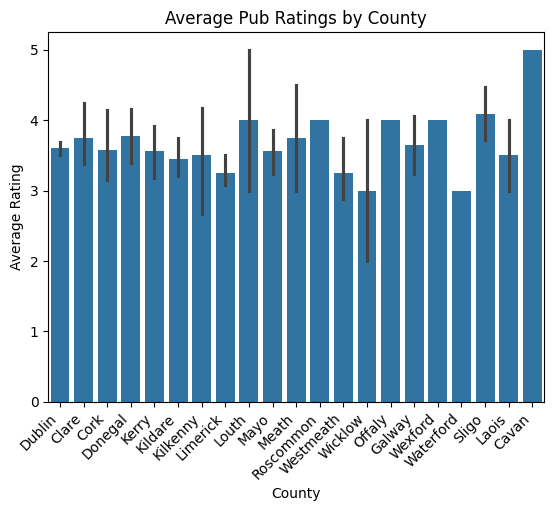

In [10]:

import seaborn as sns
sns.barplot(data=df, x="county", y='averageRating', estimator="average")
plt.title("Average Pub Ratings by County")
plt.xlabel("County")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.show()

# Simple bar chart that shows the average pub rating by county,

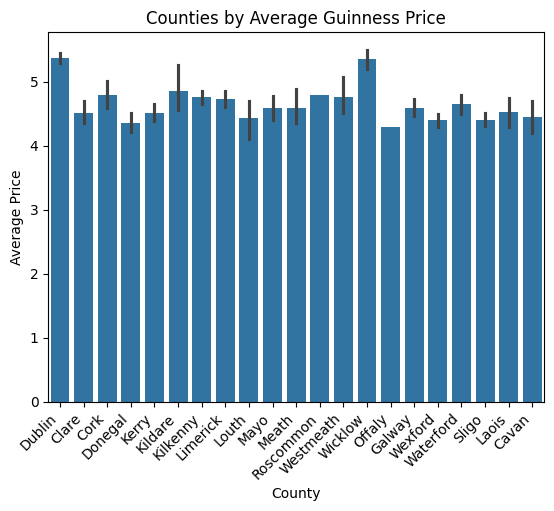

In [11]:
import seaborn as sns
sns.barplot(data=df, x="county", y="lastPrice", estimator="average")
plt.title("Counties by Average Guinness Price")
plt.xlabel("County")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha='right')
plt.show()


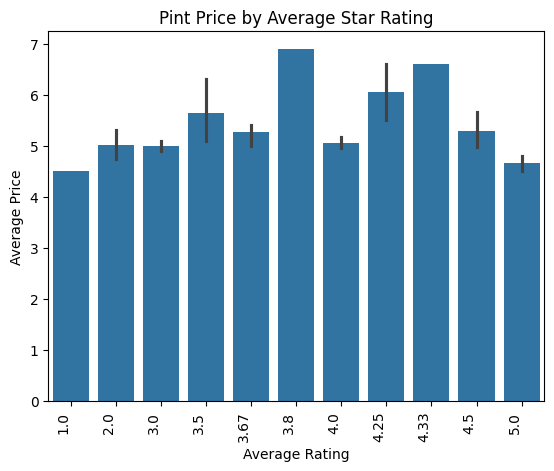

In [12]:
import seaborn as sns
sns.barplot(data=df, y="lastPrice", x="averageRating", estimator="average")
plt.title("Pint Price by Average Star Rating")
plt.xlabel("Average Rating")
plt.ylabel("Average Price")
plt.xticks(rotation=90, ha='right')
plt.show()

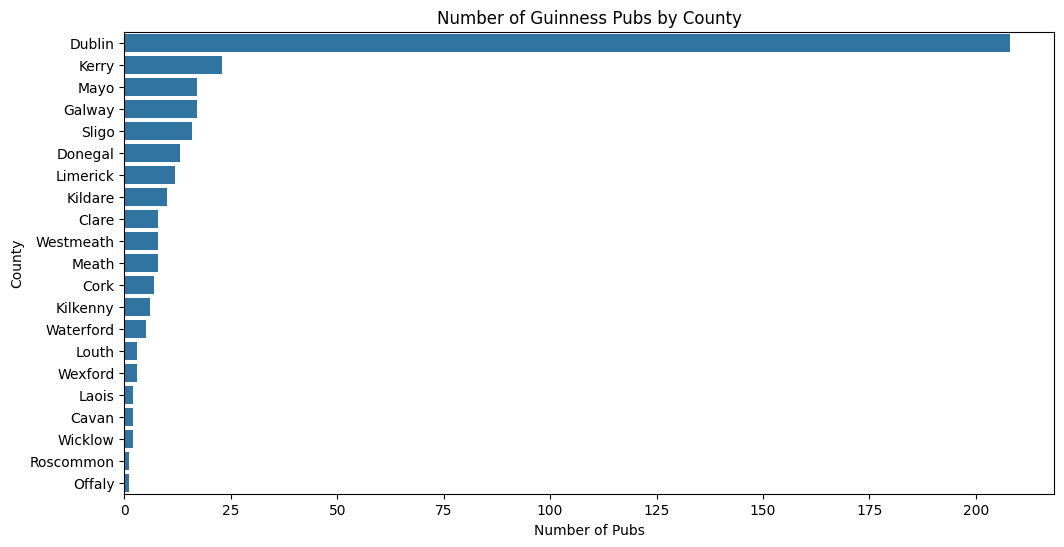

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='county', order=df['county'].value_counts().index)
plt.title("Number of Guinness Pubs by County")
plt.xlabel("Number of Pubs")
plt.ylabel("County")
plt.show()

In [14]:
top_pubs = df[df['averageRating'].notna()].sort_values('averageRating', ascending=False).head(40)
top_pubs[['name', 'county', 'averageRating']]

#This shows a list of all of the pubs with a 5 star rating.

,name,county,averageRating
348,Hotel Kilmore,Cavan,5.0
347,Mac Diarmada,Cavan,5.0
339,Brownes,Kerry,5.0
340,Susies Bar Moville,Donegal,5.0
329,Johnny Burke's Pub,Clare,5.0
333,McGowan's Bar,Sligo,5.0
17,McCloskeys,Dublin,5.0
303,Foley's,Sligo,5.0
56,Martin B. Slattery,Dublin,5.0
58,The Bankers,Dublin,5.0


### Prepare for your Pitch and Reflection (P4)

With the project code complete, its time to prepare for the final deliverable - submitting your project demo Pitch and reflection.
